# Import libraries

In [293]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Read and Inspect Data

In [294]:
country=pd.read_csv("Country-data.csv",sep=",")
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [295]:
country.shape

(167, 10)

In [296]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


# Clean the data

In [297]:
# checking missing values
country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

#### Analysis: No null values in the dataset

In [298]:
#As per the definition, modifying the features 

country['exports']=country['exports']*country['gdpp']/100
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,6.03,58.9,19100,1.44,76.8,2.13,12200


In [299]:
country['health']=country['health']*country['gdpp']/100
country['imports']=country['imports']*country['gdpp']/100
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


# Univariate analysis

In [300]:
#Getting all the columns from the dataset except country name

attributes=list(country.columns[1:])
attributes

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

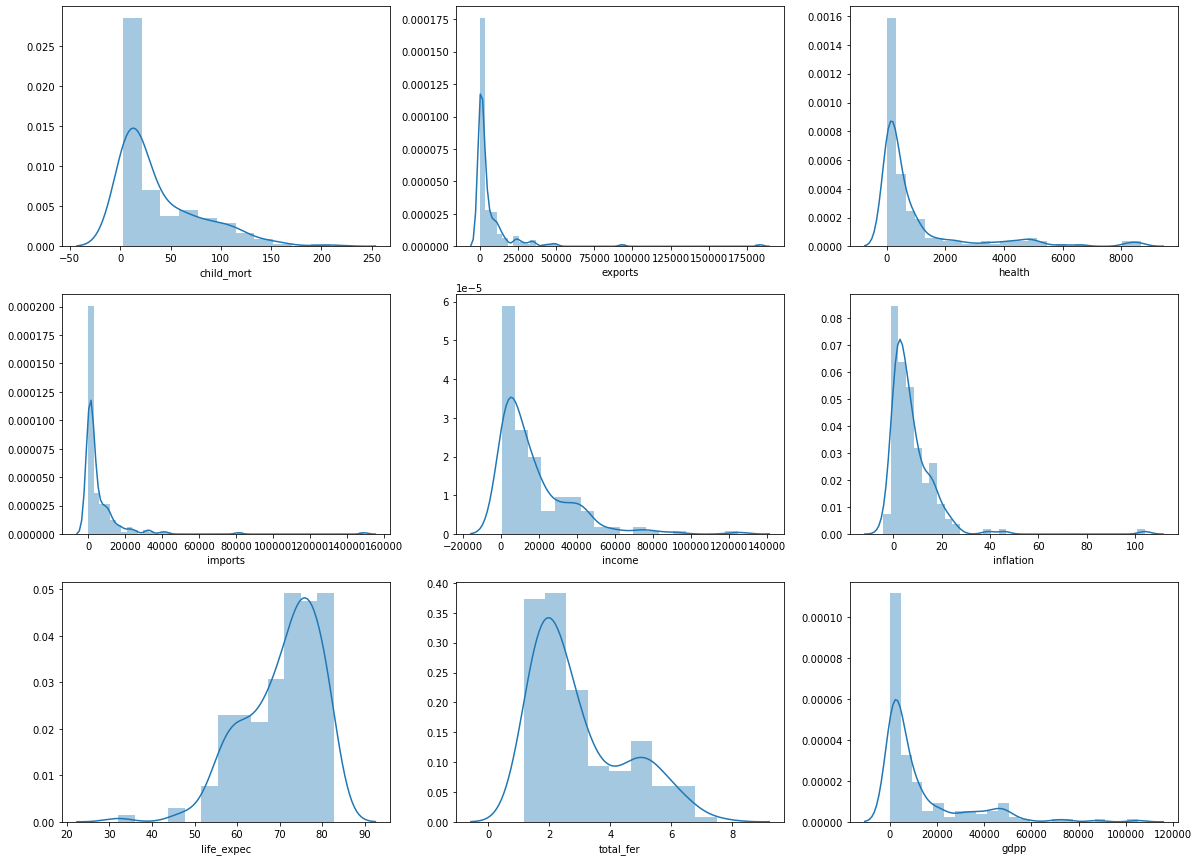

In [301]:
# Checking distribution of the columns using distplot()

row = 3
col = 3
i = 0
plt.figure(figsize=[20,15])

for a in attributes:
    i += 1
    plt.subplot(row,col,i)
    sns.distplot(country[a])
plt.show()

#### Analysis: Skewed distribution hence presence of outliers detected

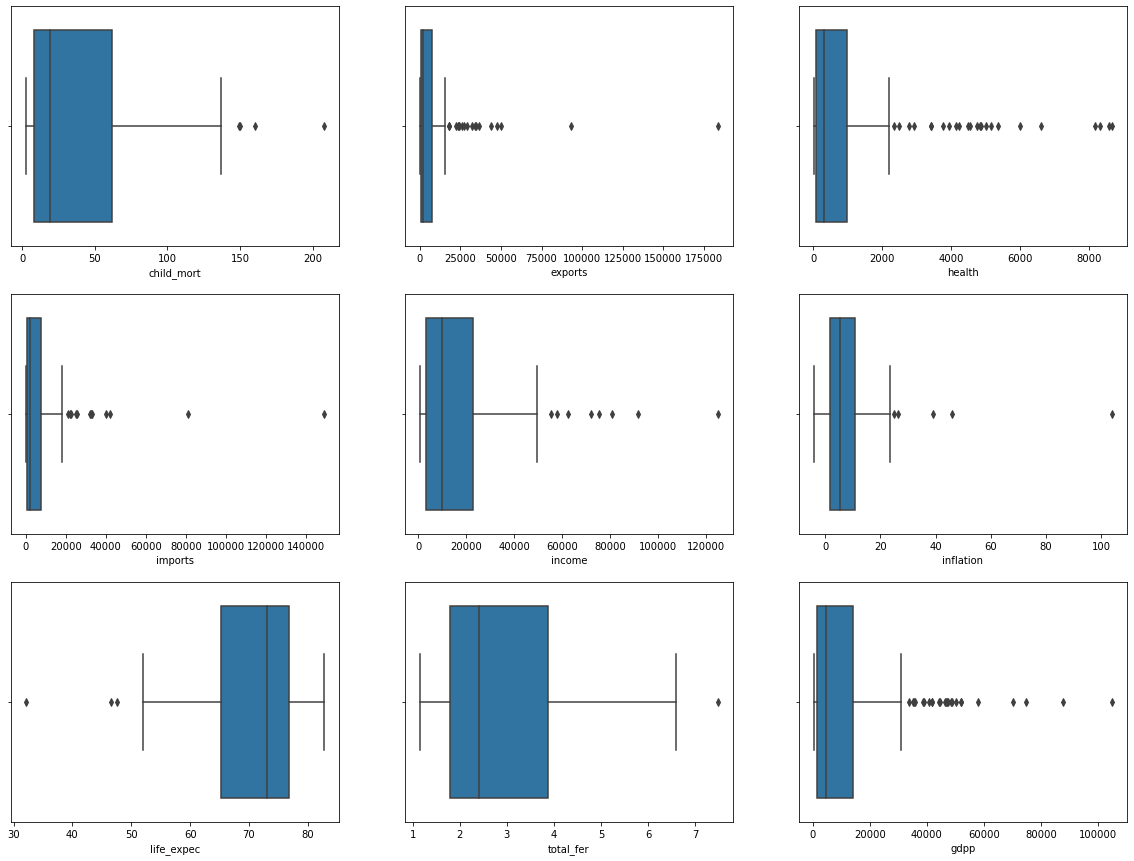

In [302]:
# checking for outliers

row = 3
col = 3
i = 0
plt.figure(figsize=[20,15])

for a in attributes:
    i += 1
    plt.subplot(row,col,i)
    sns.boxplot(country[a])

plt.show()

#### Analysis: Outliers at both ends are present. Since we require the countries requiring help, we cannot remove the countries which have extreme low values or extreme high values because they may be required while final analysis. Hence capping the values instead of removing rows. Taking 5th and 95th percentile as mark.

In [303]:
#checking the values for 1% and 99% quantile for one column
q1 = country['child_mort'].quantile(0.01)
q2 = country['child_mort'].quantile(0.99)

print(q1, q2)

2.8 153.40000000000003


In [304]:
country.shape

(167, 10)

In [305]:
#imputing outlier
#decided to got for standard 5% and 95% quantile capping

for a in attributes:
    Q1 = country[a].quantile(0.05)
    Q2 = country[a].quantile(0.95)
    country[a][country[a] <= Q1] = Q1
    country[a][country[a] >= Q2] = Q2

In [306]:
country.shape

(167, 10)

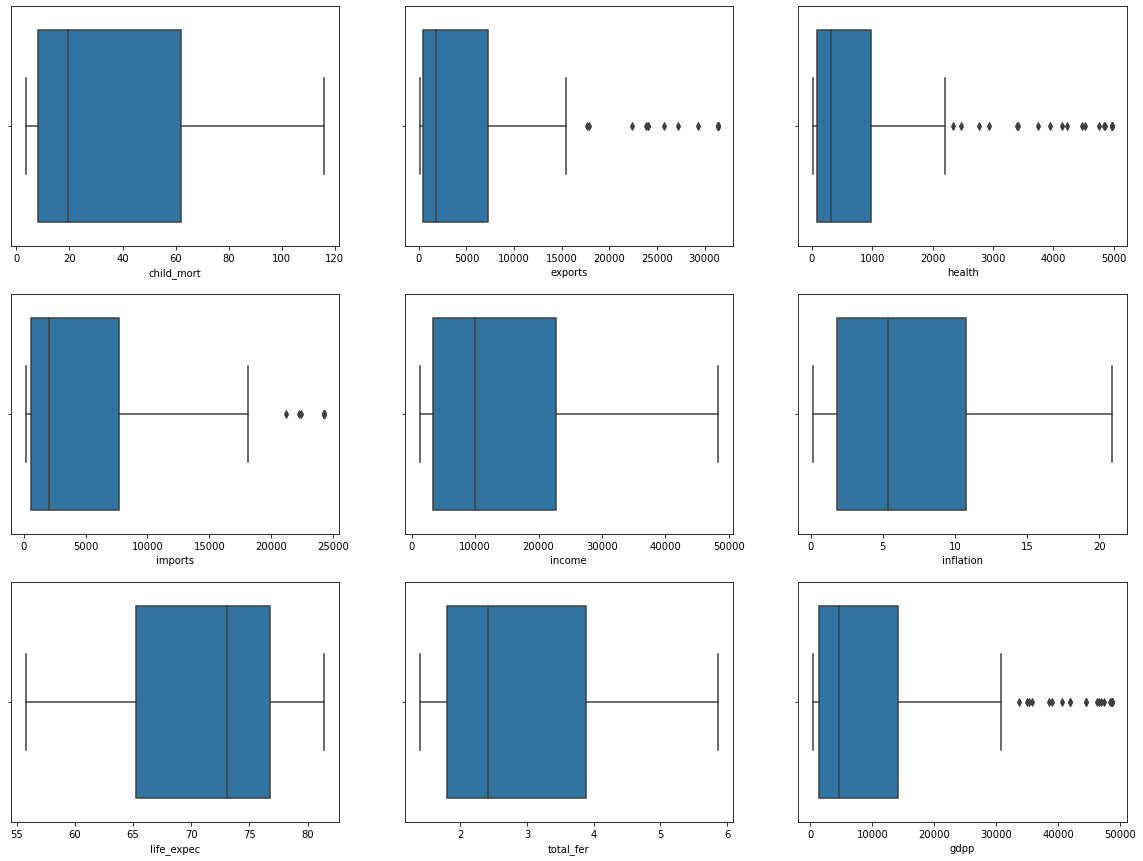

In [307]:
#plotting boxplot to check the dataset again for outlier values

row = 3
col = 3
i = 0
plt.figure(figsize=[20,15])

for a in attributes:
    i += 1
    plt.subplot(row,col,i)
    sns.boxplot(country[a])

plt.show()

# Bivariate analysis

In [308]:
country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,36.808623,5784.478480,954.366191,5142.509689,15755.491018,7.016075,70.830060,2.922389,12003.719162
std,36.193830,8579.136537,1453.198372,6694.383178,14770.353771,6.271398,8.039216,1.438264,15154.443890
min,3.460000,70.468800,26.715920,169.281000,1213.000000,0.183400,55.780000,1.390000,465.900000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000


In [309]:
#function for co-relation matrix

def corr_matrix(data,title):
    plt.figure(figsize=(15, 10))
    #Mask the upper side  
    mask = np.zeros_like(data, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    #Diagnol elements
    mask[np.diag_indices_from(mask)] = False
    
    sns.heatmap(data, cmap="YlGnBu",mask=mask,annot=True,linewidth=.3)

    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

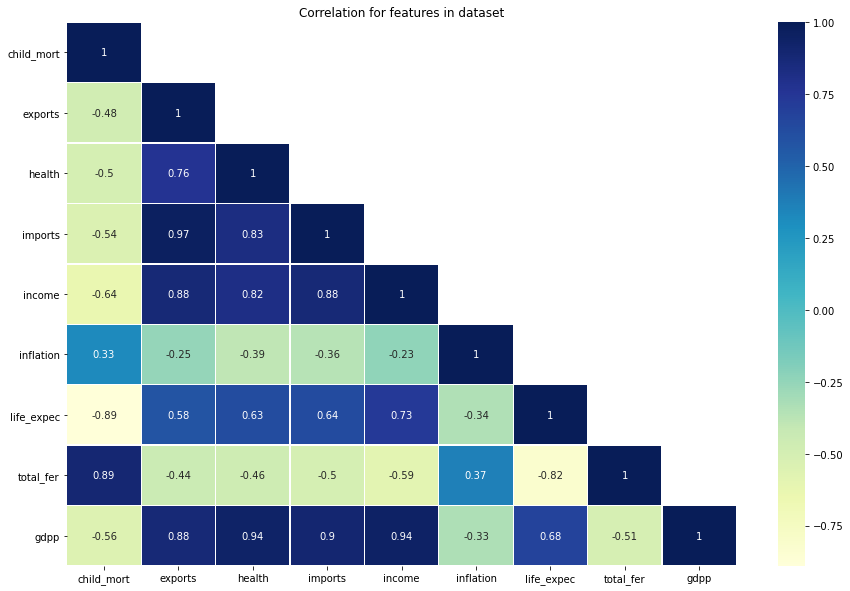

In [310]:
corr_matrix(data=country.corr(),title='Correlation for features in dataset')

#### Analysis:
1. Child mortality rate is highly co-related to total fertility rate and life expectancy. Hence we will take child mortality rate.
2. GDP has high co-relation with exports, health, imports and income.

# Hopkins Statistic

In [311]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [312]:
hopkins(country.drop('country', axis=1))

0.8747275044932463

#### Analysis: Hopkins value is high which suggests clustering tendency in the data

# Preparing data for modelling

In [313]:
model_df=country[attributes]
model_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,70.4688,41.9174,248.297,1610.0,9.44,56.2,5.820,553.0
1,16.6,1145.2000,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090.0
2,27.3,1712.6400,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460.0
3,116.0,2199.1900,100.6050,1514.370,5900.0,20.87,60.1,5.861,3530.0
4,10.3,5551.0000,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200.0


In [314]:
#importing libraries

import sklearn
from sklearn.preprocessing import StandardScaler

In [315]:
scaler=StandardScaler()

In [316]:
#scaling the features

country_scaled=scaler.fit_transform(model_df)
country_scaled.shape

(167, 9)

In [317]:
# converting to dataframe

country_scaled = pd.DataFrame(country_scaled)
country_scaled.head()

,0,1,2,3,4,5,6,7,8
0,1.479588,-0.668039,-0.629778,-0.733291,-0.960575,0.387667,-1.825310,2.020718,-0.757874
1,-0.560024,-0.542389,-0.473807,-0.472674,-0.395590,-0.404004,0.682454,-0.887331,-0.523775
2,-0.263504,-0.476048,-0.530344,-0.560668,-0.193907,1.452825,0.707406,-0.022587,-0.499286
3,2.194560,-0.419165,-0.589272,-0.543598,-0.669255,2.215708,-1.338729,2.049310,-0.560839
4,-0.734610,-0.027297,-0.150953,0.306143,0.227115,-0.891802,0.744836,-0.552591,0.012991


# Modelling

## K-Means clustering

In [318]:
# importing library
from sklearn.cluster import KMeans

#### Finding optimal value of cluster

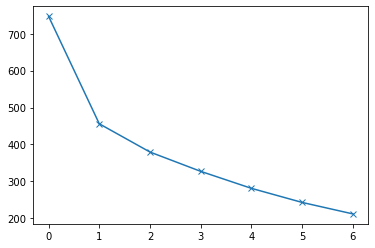

In [319]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plotting the SSDs for each n_clusters
# ssd
plt.plot(ssd,marker='x')

#### Analysis: From k=2 till k=3 there is steep decline, after that there is not much change. Hence optimal value of K=3

#### Silhoutte analysis

In [320]:
# silhouette analysis
from sklearn.metrics import silhouette_score

range_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
for cluster in range_clusters:
    kmeans = KMeans(n_clusters=cluster, max_iter=50)
    kmeans.fit(country_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(country_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(cluster, silhouette_avg))

For n_clusters=2, the silhouette score is 0.48447902987180524
For n_clusters=3, the silhouette score is 0.4203919640787207
For n_clusters=4, the silhouette score is 0.3879858729916906
For n_clusters=5, the silhouette score is 0.3608364570380793
For n_clusters=6, the silhouette score is 0.3170224233740024
For n_clusters=7, the silhouette score is 0.3098125164205753
For n_clusters=8, the silhouette score is 0.3492615653098206
For n_clusters=9, the silhouette score is 0.33744949870194074
For n_clusters=10, the silhouette score is 0.2871758080425047
For n_clusters=11, the silhouette score is 0.3082473616284302


#### Analysis: Silhoutte score for k=3 seems optimal. 

In [321]:
#first try with cluster number as 4

kmeans_1 = KMeans(n_clusters=4, max_iter=50)
kmeans_1.fit(country_scaled)

KMeans(max_iter=50, n_clusters=4)

In [322]:
#printing the value_counts for cluster size as 4

import collections
arr_1=kmeans_1.labels_
elements_count = collections.Counter(arr_1)
for key, value in elements_count.items():
    print(f"{key}: {value}")

0: 48
2: 78
1: 24
3: 17


In [323]:
#second try with cluster=5

kmeans_2 = KMeans(n_clusters=5, max_iter=50)
kmeans_2.fit(country_scaled)
arr_2=kmeans_2.labels_
elements_count = collections.Counter(arr_2)
for key, value in elements_count.items():
    print(f"{key}: {value}")

2: 44
4: 38
0: 46
1: 22
3: 17


In [324]:
# model with 3 clusters

kmeans_3 = KMeans(n_clusters=3, max_iter=50)
kmeans_3.fit(country_scaled)

KMeans(max_iter=50, n_clusters=3)

In [325]:
arr_3=kmeans_3.labels_
elements_count = collections.Counter(arr_3)
for key, value in elements_count.items():
    print(f"{key}: {value}")

0: 48
2: 82
1: 37


### Analysis: The balance of the number of countries in clusters seems best with cluster size as 3. Also using the business logic, the countries can be divided into 3 categories as developing, developed and under-developed based on socio-economic factors.

In [326]:
kmeans_3.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

In [327]:
# assigning the label with cluster size 3 as final decision

country['cluster_id'] = kmeans_3.labels_
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,70.4688,41.9174,248.297,1610.0,9.44,56.2,5.820,553.0,0
1,Albania,16.6,1145.2000,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090.0,2
2,Algeria,27.3,1712.6400,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460.0,2
3,Angola,116.0,2199.1900,100.6050,1514.370,5900.0,20.87,60.1,5.861,3530.0,0
4,Antigua and Barbuda,10.3,5551.0000,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200.0,2


In [328]:
# checking cluster counts

country['cluster_id'].value_counts()

2    82
0    48
1    37
Name: cluster_id, dtype: int64

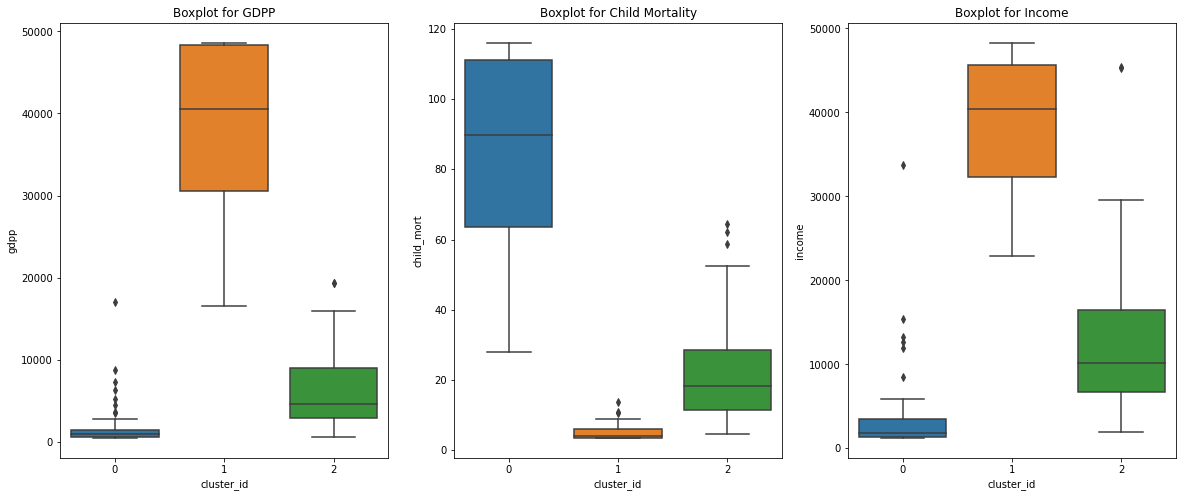

In [329]:
# Boxplot for K-means Cluster Analysis

plt.figure(figsize=[20,8])
plt.subplot(1,3,1)
sns.boxplot(x='cluster_id',y='gdpp',data=country)
plt.title("Boxplot for GDPP")
plt.subplot(1,3,2)
sns.boxplot(x='cluster_id',y='child_mort',data=country)
plt.title("Boxplot for Child Mortality")
plt.subplot(1,3,3)
sns.boxplot(x='cluster_id',y='income',data=country)
plt.title("Boxplot for Income")
plt.show()

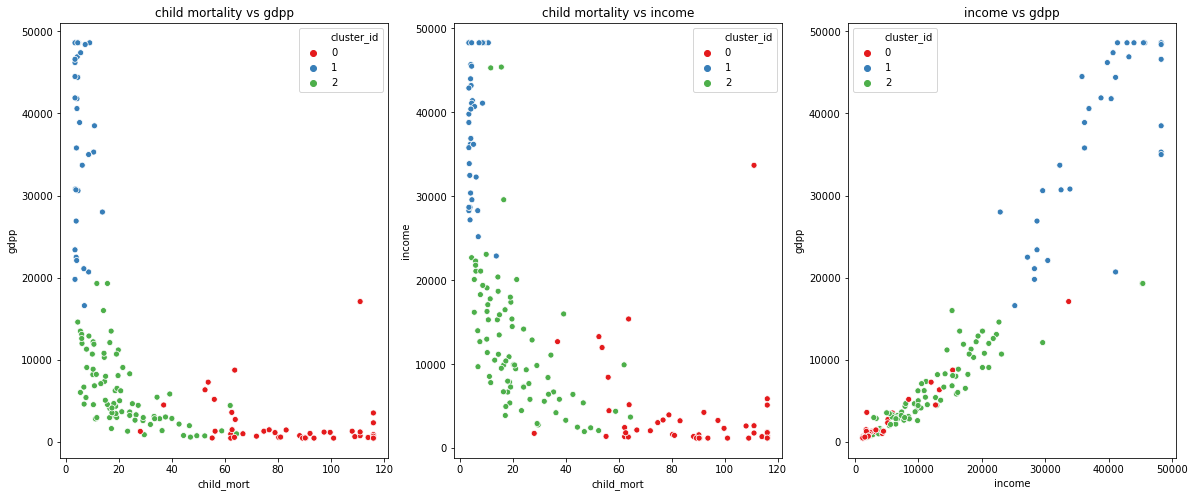

In [330]:
# Scatter plot for K-means Cluster Analysis

plt.figure(figsize=[20,8])
plt.subplot(1,3,1)
sns.scatterplot(x='child_mort',y='gdpp',data=country,hue='cluster_id',palette='Set1')
plt.title("child mortality vs gdpp")
plt.subplot(1,3,2)
sns.scatterplot(x='child_mort',y='income',data=country,hue='cluster_id',palette='Set1')
plt.title("child mortality vs income")
plt.subplot(1,3,3)
sns.scatterplot(x='income',y='gdpp',data=country,hue='cluster_id',palette='Set1')
plt.title("income vs gdpp")
plt.show()

#### Analysis: Countries in cluster 0 have low gdpp, low income and high child mortality rate.

## K-Means Cluster Profiling

In [331]:
k_mean_final_df = country[country['cluster_id']==0].sort_values(by=['gdpp', 'income', 'child_mort'], ascending= [True, True, False])
k_mean_final_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
31,Central African Republic,116.0,70.4688,26.71592,169.281,1213.0,2.01,55.78,5.210,465.9,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.71592,169.281,1213.0,20.80,57.50,5.861,465.9,0
112,Niger,116.0,77.2560,26.71592,170.868,1213.0,2.55,58.80,5.861,465.9,0
106,Mozambique,101.0,131.9850,26.71592,193.578,1213.0,7.64,55.78,5.560,465.9,0
26,Burundi,93.6,70.4688,26.79600,169.281,1213.0,12.30,57.70,5.861,465.9,0


In [332]:
k_mean_final_df.shape

(48, 11)

In [333]:
# Top 10 countries which are in direst need of help
# Final list of countries

list(k_mean_final_df['country'].head(10).values)

['Central African Republic',
 'Congo, Dem. Rep.',
 'Niger',
 'Mozambique',
 'Burundi',
 'Malawi',
 'Liberia',
 'Sierra Leone',
 'Madagascar',
 'Eritrea']

## Hierarchical Clustering

In [334]:
#import libraries

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [335]:
country_scaled.head()

,0,1,2,3,4,5,6,7,8
0,1.479588,-0.668039,-0.629778,-0.733291,-0.960575,0.387667,-1.825310,2.020718,-0.757874
1,-0.560024,-0.542389,-0.473807,-0.472674,-0.395590,-0.404004,0.682454,-0.887331,-0.523775
2,-0.263504,-0.476048,-0.530344,-0.560668,-0.193907,1.452825,0.707406,-0.022587,-0.499286
3,2.194560,-0.419165,-0.589272,-0.543598,-0.669255,2.215708,-1.338729,2.049310,-0.560839
4,-0.734610,-0.027297,-0.150953,0.306143,0.227115,-0.891802,0.744836,-0.552591,0.012991


In [336]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,70.4688,41.9174,248.297,1610.0,9.44,56.2,5.820,553.0,0
1,Albania,16.6,1145.2000,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090.0,2
2,Algeria,27.3,1712.6400,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460.0,2
3,Angola,116.0,2199.1900,100.6050,1514.370,5900.0,20.87,60.1,5.861,3530.0,0
4,Antigua and Barbuda,10.3,5551.0000,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200.0,2


In [337]:
country_scaled.shape

(167, 9)

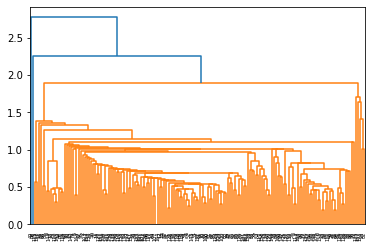

In [338]:
# single linkage

mergings = linkage(country_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

#### Analysis: This is not easily interpretable

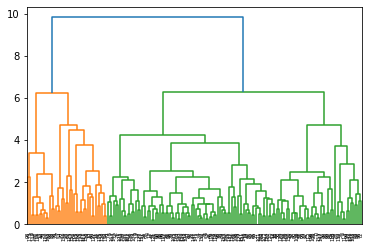

In [339]:
# complete linkage

mergings = linkage(country_scaled, method='complete', metric='euclidean')
dendrogram(mergings)
plt.show()

#### Analysis: This is visually interpretable

In [340]:
# cutting the dendogram at 3 clusters

cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 1, 2, 1, 0, 1, 1, 0,
       0, 2, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 2, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 0, 1, 1,
       0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [341]:
# assign cluster labels

country['cluster_id_hierar'] = cluster_labels
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_id_hierar
0,Afghanistan,90.2,70.4688,41.9174,248.297,1610.0,9.44,56.2,5.820,553.0,0,0
1,Albania,16.6,1145.2000,267.8950,1987.740,9930.0,4.49,76.3,1.650,4090.0,2,1
2,Algeria,27.3,1712.6400,185.9820,1400.440,12900.0,16.10,76.5,2.890,4460.0,2,1
3,Angola,116.0,2199.1900,100.6050,1514.370,5900.0,20.87,60.1,5.861,3530.0,0,0
4,Antigua and Barbuda,10.3,5551.0000,735.6600,7185.800,19100.0,1.44,76.8,2.130,12200.0,2,1


In [342]:
# checking cluster counts

country['cluster_id_hierar'] .value_counts()

1    84
0    43
2    40
Name: cluster_id_hierar, dtype: int64

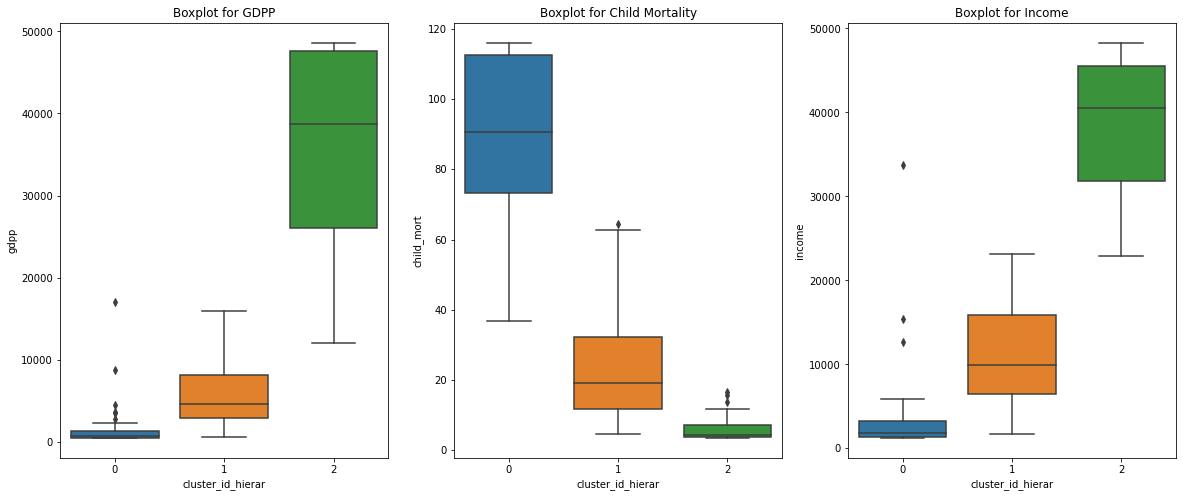

In [343]:
# Boxplot for Hierarchical Cluster Analysis

plt.figure(figsize=[20,8])
plt.subplot(1,3,1)
sns.boxplot(x='cluster_id_hierar',y='gdpp',data=country)
plt.title("Boxplot for GDPP")
plt.subplot(1,3,2)
sns.boxplot(x='cluster_id_hierar',y='child_mort',data=country)
plt.title("Boxplot for Child Mortality")
plt.subplot(1,3,3)
sns.boxplot(x='cluster_id_hierar',y='income',data=country)
plt.title("Boxplot for Income")
plt.show()

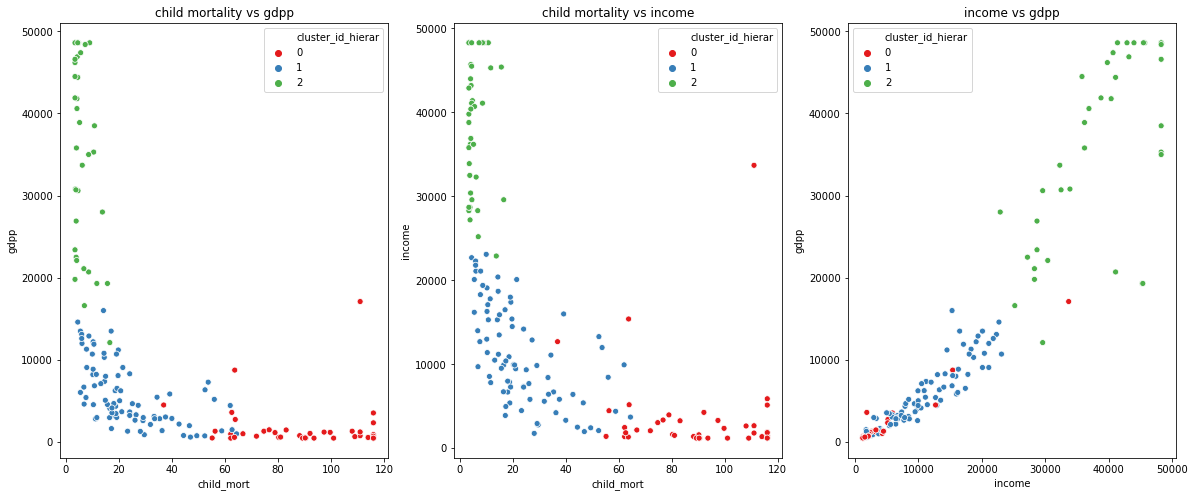

In [344]:
# Scatter plot for Hierarchical Cluster Analysis

plt.figure(figsize=[20,8])
plt.subplot(1,3,1)
sns.scatterplot(x='child_mort',y='gdpp',data=country,hue='cluster_id_hierar',palette='Set1')
plt.title("child mortality vs gdpp")
plt.subplot(1,3,2)
sns.scatterplot(x='child_mort',y='income',data=country,hue='cluster_id_hierar',palette='Set1')
plt.title("child mortality vs income")
plt.subplot(1,3,3)
sns.scatterplot(x='income',y='gdpp',data=country,hue='cluster_id_hierar',palette='Set1')
plt.title("income vs gdpp")
plt.show()

#### Analysis: Here cluster 0 has low income, low gdpp, and high child mortality rate

## Hierarchical Cluster Profiling

In [345]:
hier_final_df = country[country['cluster_id_hierar']==0].sort_values(by=['gdpp', 'income', 'child_mort'], ascending= [True, True, False])
hier_final_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_id_hierar
31,Central African Republic,116.0,70.4688,26.71592,169.281,1213.0,2.01,55.78,5.210,465.9,0,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.71592,169.281,1213.0,20.80,57.50,5.861,465.9,0,0
112,Niger,116.0,77.2560,26.71592,170.868,1213.0,2.55,58.80,5.861,465.9,0,0
106,Mozambique,101.0,131.9850,26.71592,193.578,1213.0,7.64,55.78,5.560,465.9,0,0
26,Burundi,93.6,70.4688,26.79600,169.281,1213.0,12.30,57.70,5.861,465.9,0,0


In [346]:
hier_final_df.shape

(43, 12)

In [347]:
# Top 10 countries which are in direst need of help
# Final list of countries

list(hier_final_df['country'].head(10).values)

['Central African Republic',
 'Congo, Dem. Rep.',
 'Niger',
 'Mozambique',
 'Burundi',
 'Malawi',
 'Liberia',
 'Sierra Leone',
 'Madagascar',
 'Eritrea']